In [1]:
import os
print(os.getcwd())
import torch
from torch import nn
from d2l import torch as d2l
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader


d:\a_university\1.3MLDL\LMDL


KeyboardInterrupt: 

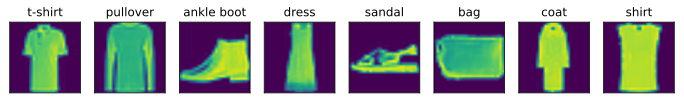

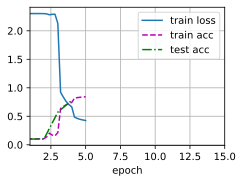

In [2]:

config={'root':'./data/fashion_minist',
        'batch_size':128,
        'num_epochs':15,
        'lr':0.05}
# 定义transform
trans = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
#加载数据集，加载时调用transform
train_dataset = torchvision.datasets.FashionMNIST(
            root=config['root'], train=True, transform=trans, download=True)
val_dataset = torchvision.datasets.FashionMNIST(
            root=config['root'], train=False, transform=trans, download=True)
#加载dataloader
train_dataloader=DataLoader(train_dataset,config['batch_size'],shuffle=True,num_workers=0)
val_dataloader=DataLoader(val_dataset,config['batch_size'],shuffle=True,num_workers=0)
#可视化dataloader
def text_labels(indices):
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]
def visualize(dataloader,visual_batch=8, nrows=1, ncols=8, labels=[]):
        X, y = next(iter(dataloader))
        X=X[:visual_batch]
        y=y[:visual_batch]
        if not labels:
            labels = text_labels(y)
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
visualize(train_dataloader)
#d2l.plt.show()

#定义块
def vgg_block(num_convs,out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels,kernel_size=3,padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)
# def init_cnn(module):
#     if type(module) == nn.Linear or type(module) == nn.Conv2d:
#         nn.init.xavier_uniform_(module.weight)
class VGG(nn.Module):
    def __init__(self,arch,num_classes=10):
        super().__init__()
        conv_blks=[]
        for (num_convs,out_channels) in arch:
                conv_blks.append(vgg_block(num_convs,out_channels))
        self.net=nn.Sequential(*conv_blks,nn.Flatten(),
                                nn.LazyLinear(4096),nn.ReLU(),nn.Dropout(p=0.5),
                                nn.LazyLinear(4096),nn.ReLU(),nn.Dropout(p=0.5),
                                nn.LazyLinear(num_classes))
        #self.net.apply(init_cnn)
    def forward(self,X):
          return self.net(X)

my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(my_device)
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)))
d2l.train_ch6(model,train_dataloader,val_dataloader,num_epochs=config['num_epochs'],lr=config['lr'],device=my_device)